##  우리집과 영등포구 중학교

In [2]:
import requests, json
import folium
import pandas as pd
from urllib.parse import quote

In [3]:
stations = '신길중학교, 대영중학교 , 영원중학교, 영남중학교, 영서중학교'.split(',')
home = '서울시 영등포구 영신로9길 37-4'

In [4]:
with open('keys/도로명주소apiKey.txt') as file:
    road_key= file.read()

- URL 만들기

In [9]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'

In [10]:
road_addr_list = []
for station in stations:
    params2 = f'keyword={quote(station)}&resultType=json'
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url)
    if result.status_code == 200:
        res = json.loads(result.text)
        road_addr_list.append(res['results']['juso'][0]['roadAddr'])
    else:
        print(result.status_code)

In [11]:
df1 = pd.DataFrame({
    '이름': stations, '주소': road_addr_list
})
df1

,이름,주소
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동)
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동)
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동)
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동)
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동)


In [12]:
df1.to_csv('data/영등포 중학교.csv', index=False)
pd.read_csv('data/영등포 중학교.csv')

,이름,주소
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동)
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동)
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동)
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동)
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동)


In [13]:
with open('keys/카카오apiKey.txt') as file:
    kakao_key = file.read()

In [14]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '서울 영등포구 신길로28길 43'

In [15]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [17]:
df1 = pd.read_csv('data./영등포 중학교.csv')
df1

,이름,주소
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동)
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동)
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동)
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동)
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동)


In [18]:
lat_list, lng_list = [], []
for i in df1.index:
    url = f'{base_url}?query={quote(df1["주소"][i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [19]:
df1['위도'] = lat_list
df1['경도'] = lng_list
df1

,이름,주소,위도,경도
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동),37.502035,126.915436
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동),37.503438,126.905208
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동),37.514974,126.913647
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동),37.497872,126.895836
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동),37.489114,126.895615


In [20]:
df1.to_csv('data/영등포 중학교.csv', index=False)
pd.read_csv('data/영등포 중학교.csv')

,이름,주소,위도,경도
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동),37.502035,126.915436
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동),37.503438,126.905208
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동),37.514974,126.913647
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동),37.497872,126.895836
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동),37.489114,126.895615


In [21]:
df1['image'] = ['신길중학교.jpg', '대영중학교.jpg', '영원중학교.jpg', '영남중학교.jpg', '영서중학교.jpg']
df1

,이름,주소,위도,경도,image
0,신길중학교,서울특별시 영등포구 신길로28길 43 (신길동),37.502035,126.915436,신길중학교.jpg
1,대영중학교,서울특별시 영등포구 도림로80가길 14 (신길동),37.503438,126.905208,대영중학교.jpg
2,영원중학교,서울특별시 영등포구 영등포로62길 31 (영등포동),37.514974,126.913647,영원중학교.jpg
3,영남중학교,서울특별시 영등포구 대림로31나길 17 (대림동),37.497872,126.895836,영남중학교.jpg
4,영서중학교,서울특별시 구로구 도림로20길 35 (구로동),37.489114,126.895615,영서중학교.jpg



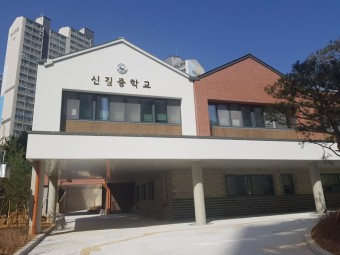
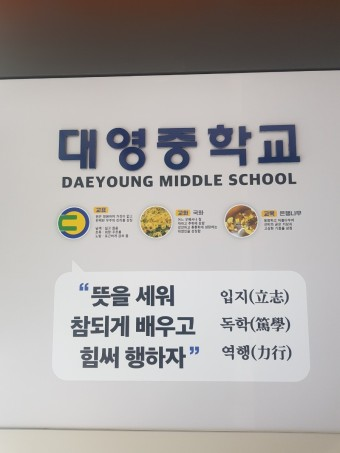
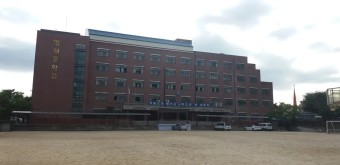
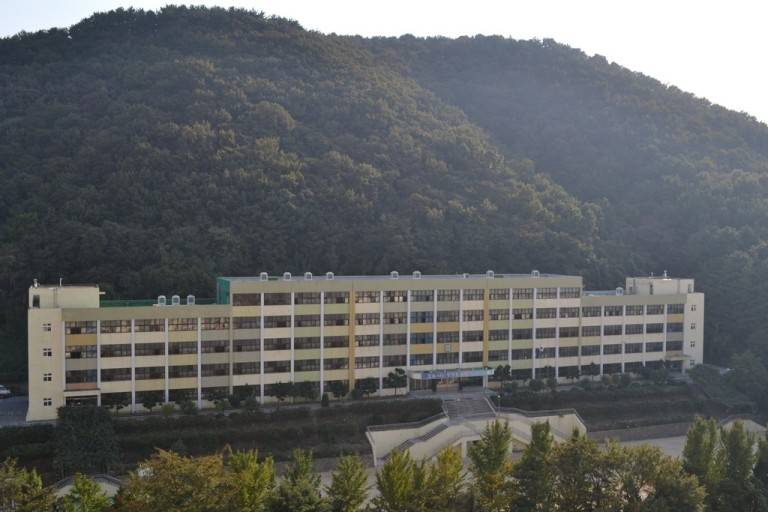
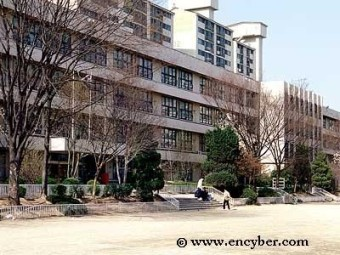
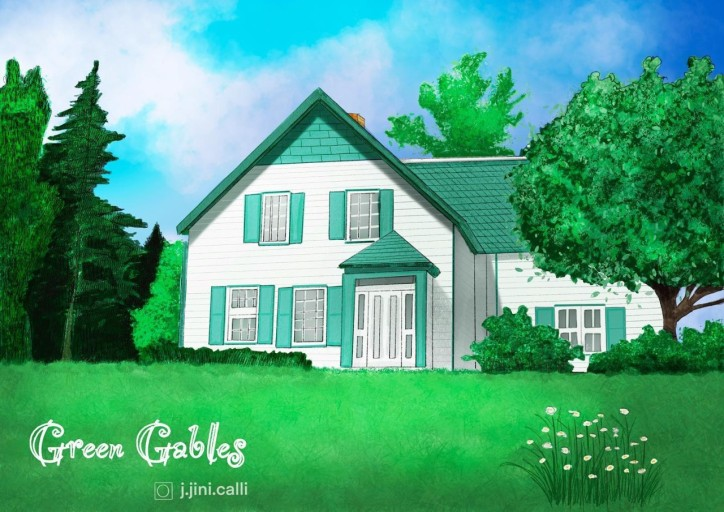

In [22]:
map = folium.Map(location=[df1.위도.mean(), df1.경도.mean()], zoom_start=14)  # Center position
for i in df1.index:
    folium.Marker(
    location=[df1.위도[i], df1.경도[i]],            
    icon=folium.CustomIcon(f'data/{df1.image[i]}', icon_size=(50,50))
    ).add_to(map)
    folium.Marker(
    location=[df1.위도[i], df1.경도[i]], 
    icon= folium.DivIcon(icon_size=(80,20), icon_anchor=(20,0),
                         html=f'<span style="font-size: 10pt">{df1.이름[i]}</span>')
    ).add_to(map)

folium.Marker(
location=[37.5110712, 126.9059139],            # WGS94 죄표계: 위도(latitude), 경도(longitude)
icon=folium.CustomIcon('data/home.jpg', icon_size=(50,50))
).add_to(map)
    
title_html = '<h3 align="center" style="font-size:20px">영등포</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map